In [1]:
import pybeam.precoded as pbp


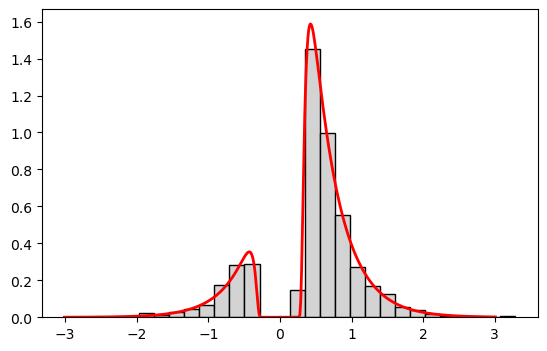

In [4]:
model = pbp.simpleDDM()

phi = {'tnd' : 0.25,
         'w' : 0.5,
        'mu' : 1.0,
         'b' : 0.75}

rt = pbp.simulate(N_sims = 1000, model = model, phi = phi, seed = 456)
fig = pbp.plot_rt(model = model, phi = phi, rt_max = 3.0, rt = rt);


In [5]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', 
       'p_b' : 'Uniform("b", lower = 0.1, upper = 2.5)'}

c0 = {'rt' : rt, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'b' : 'p_b'}

c = {0 : c0}

idata = pbp.inference(model = model,   
                     priors = p,       
                 conditions = c,       
                    samples = 25000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'simpleDDM')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [b, mu, w, tnd]


/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 42 seconds.


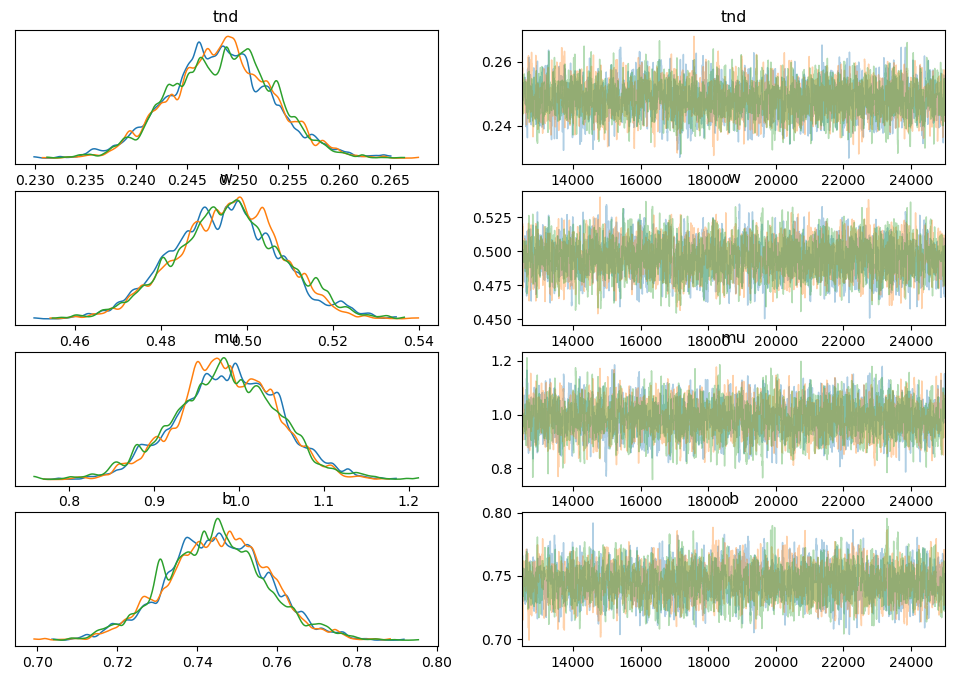

In [6]:
pbp.plot_idata(file_name = 'simpleDDM', burnin = 12500);


In [7]:
pbp.summary(file_name = 'simpleDDM', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.248,0.005,0.239,0.257,0.000,0.000,2535.0,3914.0,1.0
w,0.495,0.012,0.472,0.519,0.000,0.000,2504.0,3159.0,1.0
mu,0.986,0.060,0.871,1.095,0.001,0.001,2279.0,2863.0,1.0
b,0.745,0.013,0.720,0.768,0.000,0.000,2142.0,3258.0,1.0
